# Categorical Encoding
- For nominal features, will apply One-Hot Encoding
- For Ordinal features, will apply Ordinal Encoding

In [ ]:
# Split categorical features based on nominal and ordinal features
cat_nominal_features = {
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType','SaleCondition',
    'Foundation', 'BsmtFinType1', 'BsmtFinType2', 'Heating','CentralAir', 'Electrical', 'Condition1',
    'Condition2', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr','TotRmsAbvGrd', 'Functional', 'Fireplaces',
    'GarageType', 'GarageFinish', 'PavedDrive', '3SsnPorch', 'MiscFeature', 'SaleType'
}
cat_ordinal_features = {
    'BsmtCond',
    'BsmtExposure',
    'BsmtQual',
    'ExterCond',
    'ExterQual',
    'Fence',
    'FireplaceQu',
    'GarageCars',
    'GarageCond',
    'GarageQual',
    'HeatingQC',
    'KitchenQual',
    'MiscVal',
    'MoSold',
    'PoolQC',
    'YrSold'
}

# Split categorical features based on numeric and string vals
cat_num_vals = {'KitchenAbvGr', 'HalfBath', 'BedroomAbvGr', 'FullBath', 'BsmtHalfBath', 'BsmtFullBath', 'TotRmsAbvGrd' , 'Fireplaces', 'MoSold', 'GarageCars', 'YrSold', '3SsnPorch', 'MSSubClass', 'MiscVal'}
cat_str_vals = {
    'Alley',
    'BldgType',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'BsmtQual',
    'CentralAir',
    'Condition1',
    'Condition2',
    'Electrical',
    'ExterCond',
    'ExterQual',
    'Exterior1st',
    'Exterior2nd',
    'Fence',
    'FireplaceQu',
    'Foundation',
    'Functional',
    'GarageCond',
    'GarageFinish',
    'GarageQual',
    'GarageType',
    'Heating',
    'HeatingQC',
    'HouseStyle',
    'KitchenQual',
    'LandContour',
    'LandSlope',
    'LotConfig',
    'LotShape',
    'MSZoning',
    'MasVnrType',
    'MiscFeature',
    'Neighborhood',
    'PavedDrive',
    'PoolQC',
    'RoofMatl',
    'RoofStyle',
    'SaleCondition',
    'SaleType',
    'Street',
    'Utilities'
}

cat_str_ordinal_vals = list(cat_str_vals - cat_nominal_features)
cat_str_nominal_vals = list(cat_str_vals - cat_ordinal_features)

In [ ]:
def encode_cat_feats(data:pd.DataFrame):

    # Label encoding for the ordinal categorical features
    str2num_values = {
        'ExterQual': {'Po':0, 'Fa':1, 'TA':2, 'Gd':3 ,'Ex':4},
        'ExterCond': {'Po':0, 'Fa':1, 'TA':2, 'Gd':3 ,'Ex':4},
        'PoolQC': {'No Pool':0, 'Fa':1, 'TA':2, 'Gd':3 ,'Ex':4},
        'FireplaceQu': {'Wall':0, 'OthW':1, 'Grav':2, 'GasW':3 ,'GasA':4, 'Floor':5},
        # 'Condition2': {0:'RRAe', 1:'RRNe', 2:'PosA', 3:'PosN' ,4:'RRAn', 5:'RRNn', 6:'Norm', 7:'Feedr', 8:'Artery'},
        'BsmtCond': {'No Basement':0, 'Po':1, 'Fa':2, 'TA':3 ,'Gd':4,'Ex':5},
        'GarageQual': {'No Garage':0, 'Po':1, 'Fa':2, 'TA':3 ,'Gd':4,'Ex':5},
        'Fence': {'No Fence':0, 'MnWw':1, 'GdWo':2, 'MnPrv':3 ,'GdPrv':4},
        'BsmtQual': {'No Basement':0, 'Po':1, 'Fa':2, 'TA':3 ,'Gd':4,'Ex':5},
        'GarageCond': {'No Basement':0, 'Po':1, 'Fa':2, 'TA':3 ,'Gd':4,'Ex':5},
        'HeatingQC': {'Po':0, 'Fa':1, 'TA':2, 'Gd':3 ,'Ex':4},
        'KitchenQual': {'Po':0, 'Fa':1, 'TA':2, 'Gd':3 ,'Ex':4},
        'BsmtExposure': {'No Basement':0, 'No':1, 'Mn':2, 'Av':3 ,'Gd':4}
    }

    cols = list(str2num_values.keys())
    data[cols] = data[cols].apply(lambda col: col.replace((str2num_values[col.name])))
    
    # Create dummies variables for the nominal categorical features
    data = pd.get_dummies(data=data, drop_first=True)

    print(data.shape)

    return data

df_train_modified = encode_cat_feats(df_train_modified)
df_test_modifid = encode_cat_feats(df_test_modifid)

(1446, 230)
(1459, 214)


# Feature Engineering

## Train/Test split

In [ ]:
X_train, y_train = df_train_modified.drop(columns=['Id','SalePrice']), df_train_modified['SalePrice']
X_test, X_test_Id = df_test_modifid.drop(columns=['Id']), df_test_modifid['Id']

## Selection

In [ ]:
@dataclass
class TestResult:
    """class for storing test results"""
    specs: list[str]
    scores: list[Union[int, float]]
    res: pd.DataFrame = field(init=False, repr=False)

    def __post_init__(self):
        # Grouping results in DataFrame
        self.res = pd.DataFrame()
        self.res['Specs'] = self.specs
        self.res['Score'] = self.scores

@dataclass
class FeatureRank:
    """
    class for holding feature ranking
    """

    func: Callable[[pd.DataFrame, pd.DataFrame], list[float]]
    X: pd.DataFrame
    y: pd.DataFrame
    test_result: TestResult = field(init=False)


    
    def __post_init__(self):
        """Call it after initialize a new instance"""
        
        # Calculate feature ranking
        score_vals, feats = self.func(self.X, self.y)
        
        # Create test result
        ranks = score_vals[0] if(len(score_vals)==2) else score_vals

        # Normalize ranks
        ranks = (ranks - ranks.min()) / (ranks.max() - ranks.min())

        self.test_result = TestResult(feats, ranks)

        # Change the index of the DataFrame
        self.test_result.res.index = [self.X.columns.get_loc(spec) for spec in self.test_result.res['Specs']]
    
    def get_largest_score(self, n:Union[int, str] = 'auto') -> list[str]:
        """Get the largest n scores"""
        if(isinstance(n, str) and n=='auto'):
            n = self.test_result.res.shape[0]
        
        return self.test_result.res.nlargest(n, columns=['Score'])['Specs'].values

    def feat_imp_plot(self, title, sorting=False):
        """Plot feature importance as bar plot"""

        # Take copy of result to avoid modifying on original result
        result = self.test_result.res.copy()
        
        if(sorting):
            result = result.sort_values(by='Score', ascending=False)
            
        fig = plt.figure(figsize=(20,8))
        ax  = fig.add_subplot()
        axs = sns.barplot(x='Specs', y='Score', data=result, palette = 'viridis', ax=ax)

        # Add rank values as annotation to bars 
        for p in axs.patches:
            axs.annotate('{:.2f}'.format(p.get_height()), (p.get_x(), p.get_height()))
        plt.box(False)
        ax.set_title(title, fontsize=16)
        ax.set_xlabel('\n Features')
        ax.set_ylabel('Importance \n')
        ax.set_xticklabels(ax.get_xticklabels(), fontsize=12, rotation=30)

        return ax

        

### Correlation

<AxesSubplot:title={'center':'Correlation - feature importance'}, xlabel='\n Features', ylabel='Importance \n'>

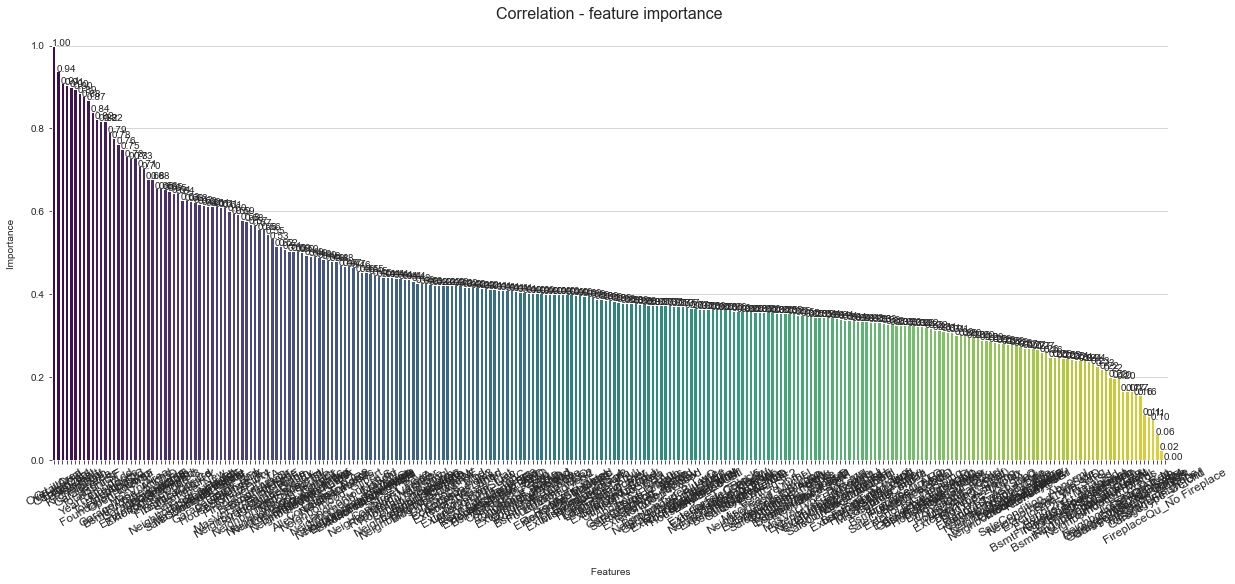

In [ ]:
def corr_score(X:pd.DataFrame, y:pd.Series):
    """Calculate target-vars correlation """
    
    # Get entire data
    data = pd.concat([X, y], axis=1)

    # Change data columns after combination
    data.columns = X.columns.to_list() + [y.name]
    
    # Calculate the correlation matrix
    corr_mat = data.corr(method='spearman')

    # get correlated values with target
    target_corr_values = corr_mat[y.name].to_numpy()[:-1]

    
    return target_corr_values, corr_mat[y.name].index[:-1]

corr_rank = FeatureRank(corr_score, X_train, y_train)
corr_rank.feat_imp_plot(title='Correlation - feature importance', sorting=True)

### Multicollinearity Detecting
Variable Inflation Factors (VIF):
- VIF starts at 1 and has no upper limit
- VIF = 1, no correlation between the independent variable and the other variables
- VIF exceeding 5 or 10 indicates high multicollinearity between this independent variable and the others

In conclusion, sqft_living15 & sqft_lot15 could be predicted by other variables so we can delete them.

In [ ]:
# def check_multi_collinearity(data:pd.DataFrame,):
def check_multi_collinearity(X:pd.DataFrame, y:pd.Series):
    """
    Check if there is multi collinearity between features
    
    Notes:
    --------
    This process needs data to not contain missing values
    """

    vif = pd.DataFrame()
    vif.index = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    # vif["Correlated to target"] = data['SalePrice']
    # vif = vif.sort_values(by='Correlated to target', ascending=False)

    return vif

check_multi_collinearity(X_train, y_train)

,VIF
MSSubClass,33.7175955523
LotArea,2.7134077059
OverallQual,5.4273654075
OverallCond,2.5952583272
YearBuilt,14.1974908600
YearRemodAdd,3.5305964845
MasVnrArea,2.8987580152
ExterQual,3.9878322896
ExterCond,1.5686815893
BsmtQual,7.0626835181


### Feature importance - Entropy

<AxesSubplot:title={'center':'Mutual Info - feature importance'}, xlabel='\n Features', ylabel='Importance \n'>

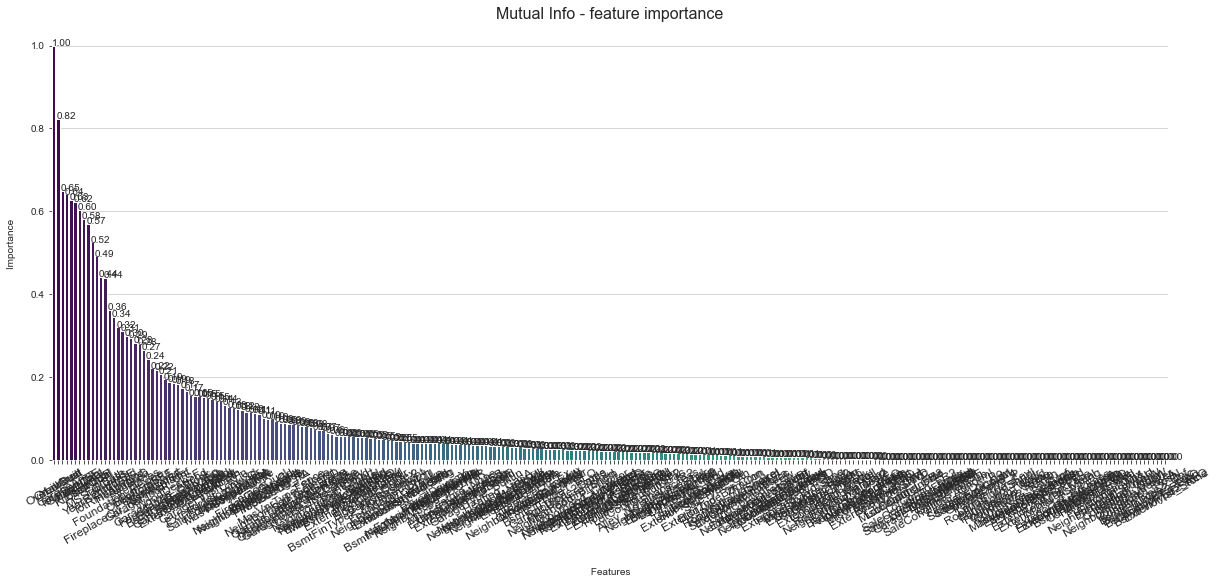

In [ ]:
def mutual_info_score(X:pd.DataFrame, y:pd.Series):
    """Calculate Tree-based score"""
    mutual_info = mutual_info_regression(X, y)
    return mutual_info, X.columns

mutual_info_rank = FeatureRank(mutual_info_score, X_train, y_train)
mutual_info_rank.feat_imp_plot('Mutual Info - feature importance', sorting=True)

### Tree-Based

<AxesSubplot:title={'center':'Tree-Based - feature importance'}, xlabel='\n Features', ylabel='Importance \n'>

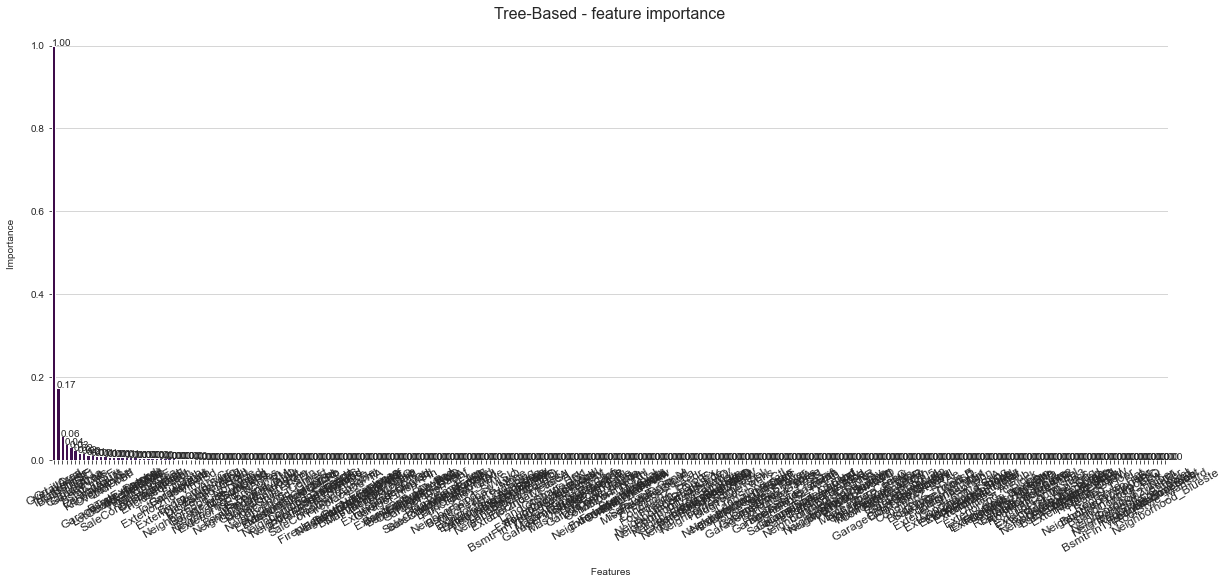

In [ ]:
def tree_based_score(X:pd.DataFrame, y:pd.Series):
    """Calculate Tree-based score"""
    dt_model_selector = DecisionTreeRegressor()
    dt_model_selector.fit(X, y)
    return dt_model_selector.feature_importances_, X.columns

tree_based_rank = FeatureRank(tree_based_score, X_train, y_train)
tree_based_rank.feat_imp_plot('Tree-Based - feature importance', sorting=True)

## Transformation
- Since the goal is to use **Linear Regression** which is considered as **Gradient-based** algorithm.Then, numerical variables should be **Normally** distributed.
- **Min-Max** scaler and **Standard** scaler are very sensitive to the *presence* of outliers.


In [ ]:
X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

### QuantileTransformer

In [ ]:
rng = np.random.RandomState(304)

# n_quantiles is set to the training set size rather than the default value
# to avoid a warning being raised by this example
qt_scaler = QuantileTransformer(n_quantiles=500, output_distribution='normal',
                         random_state=rng)

X_train_norm.iloc[:,:] = qt_scaler.fit_transform(X_train_norm.iloc[:,:])
X_test_norm.iloc[:,:] = qt_scaler.transform(X_test_norm.iloc[:,:])

y_train_norm = pd.Series(qt_scaler.fit_transform(y_train.to_numpy().reshape(-1,1)).ravel(), name='price')
y_test_norm = pd.Series(qt_scaler.transform(y_test.to_numpy().reshape(-1,1)).ravel(), name='price')

In [ ]:
plot_kde(X_train_norm)